<a href="https://colab.research.google.com/github/leoniedyt/Project-DSML/blob/Project_dsml/project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd

In [2]:
df_interactions_train = pd.read_csv('https://raw.githubusercontent.com/leoniedyt/Project-DSML/refs/heads/Project_dsml/Data/interactions_train.csv')
display(df_interactions_train.head())

,u,i,t
0,4456,8581,1.687541e+09
1,142,1964,1.679585e+09
2,362,3705,1.706872e+09
3,1809,11317,1.673533e+09
4,4384,1323,1.681402e+09


In [3]:
df_items = pd.read_csv('https://raw.githubusercontent.com/leoniedyt/Project-DSML/refs/heads/Project_dsml/Data/items.csv')
display(df_items.head())

,Title,Author,ISBN Valid,Publisher,Subjects,i
0,Classification décimale universelle : édition ...,NaN,9782871303336; 2871303339,Ed du CEFAL,Classification décimale universelle; Indexatio...,0
1,Les interactions dans l'enseignement des langu...,"Cicurel, Francine, 1947-",9782278058327; 2278058320,Didier,didactique--langue étrangère - enseignement; d...,1
2,Histoire de vie et recherche biographique : pe...,NaN,2343190194; 9782343190198,L'Harmattan,Histoires de vie en sociologie; Sciences socia...,2
3,Ce livre devrait me permettre de résoudre le c...,"Mazas, Sylvain, 1980-",9782365350020; 236535002X; 9782365350488; 2365...,Vraoum!,Moyen-Orient; Bandes dessinées autobiographiqu...,3
4,Les années glorieuses : roman /,"Lemaitre, Pierre, 1951-",9782702180815; 2702180817; 9782702183618; 2702...,Calmann-Lévy,France--1945-1975; Roman historique; Roman fra...,4


In [4]:
df_submissions= pd.read_csv('https://raw.githubusercontent.com/leoniedyt/Project-DSML/refs/heads/Project_dsml/Data/sample_submission.csv')
display(df_submissions.head())

,user_id,recommendation
0,0,3758 11248 9088 9895 5101 6074 9295 14050 1096...
1,1,3263 726 1589 14911 6432 10897 6484 7961 8249 ...
2,2,13508 9848 12244 2742 11120 2893 2461 5439 116...
3,3,2821 10734 6357 5934 2085 12608 12539 10551 10...
4,4,12425 219 11602 1487 14178 489 13888 2110 4413...


1. Data preparation and exploration :
Read the interactions, book metadata, and sample submission files, examining key statistics to understand data distribution, rental patterns, and popular book


    1.1 Aperçu général des datasets

In [5]:
# Aperçu des données d'interactions
print("Interactions Data:")
display(df_interactions_train.head())
print(df_interactions_train.info())
print(df_interactions_train.describe())

# Aperçu des données des items
print("\nItems Data:")
display(df_items.head())
print(df_items.info())
print(df_items.describe())

# Aperçu des données de soumission
print("\nSample Submission Data:")
display(df_submissions.head())
print(df_submissions.info())
print(df_submissions.describe())

Interactions Data:


,u,i,t
0,4456,8581,1.687541e+09
1,142,1964,1.679585e+09
2,362,3705,1.706872e+09
3,1809,11317,1.673533e+09
4,4384,1323,1.681402e+09


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 87047 entries, 0 to 87046
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   u       87047 non-null  int64  
 1   i       87047 non-null  int64  
 2   t       87047 non-null  float64
dtypes: float64(1), int64(2)
memory usage: 2.0 MB
None
                  u             i             t
count  87047.000000  87047.000000  8.704700e+04
mean    3290.827898   6804.254598  1.695743e+09
std     2266.663449   4441.228450  1.419829e+07
min        0.000000      0.000000  1.672664e+09
25%     1309.000000   2843.000000  1.683051e+09
50%     2831.000000   6482.000000  1.695917e+09
75%     5162.000000  10620.000000  1.707222e+09
max     7837.000000  15290.000000  1.728925e+09

Items Data:


,Title,Author,ISBN Valid,Publisher,Subjects,i
0,Classification décimale universelle : édition ...,NaN,9782871303336; 2871303339,Ed du CEFAL,Classification décimale universelle; Indexatio...,0
1,Les interactions dans l'enseignement des langu...,"Cicurel, Francine, 1947-",9782278058327; 2278058320,Didier,didactique--langue étrangère - enseignement; d...,1
2,Histoire de vie et recherche biographique : pe...,NaN,2343190194; 9782343190198,L'Harmattan,Histoires de vie en sociologie; Sciences socia...,2
3,Ce livre devrait me permettre de résoudre le c...,"Mazas, Sylvain, 1980-",9782365350020; 236535002X; 9782365350488; 2365...,Vraoum!,Moyen-Orient; Bandes dessinées autobiographiqu...,3
4,Les années glorieuses : roman /,"Lemaitre, Pierre, 1951-",9782702180815; 2702180817; 9782702183618; 2702...,Calmann-Lévy,France--1945-1975; Roman historique; Roman fra...,4


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15291 entries, 0 to 15290
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Title       15291 non-null  object
 1   Author      12638 non-null  object
 2   ISBN Valid  14568 non-null  object
 3   Publisher   15266 non-null  object
 4   Subjects    13068 non-null  object
 5   i           15291 non-null  int64 
dtypes: int64(1), object(5)
memory usage: 716.9+ KB
None
                  i
count  15291.000000
mean    7645.000000
std     4414.275818
min        0.000000
25%     3822.500000
50%     7645.000000
75%    11467.500000
max    15290.000000

Sample Submission Data:


,user_id,recommendation
0,0,3758 11248 9088 9895 5101 6074 9295 14050 1096...
1,1,3263 726 1589 14911 6432 10897 6484 7961 8249 ...
2,2,13508 9848 12244 2742 11120 2893 2461 5439 116...
3,3,2821 10734 6357 5934 2085 12608 12539 10551 10...
4,4,12425 219 11602 1487 14178 489 13888 2110 4413...


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7838 entries, 0 to 7837
Data columns (total 2 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   user_id         7838 non-null   int64 
 1   recommendation  7838 non-null   object
dtypes: int64(1), object(1)
memory usage: 122.6+ KB
None
           user_id
count  7838.000000
mean   3918.500000
std    2262.780038
min       0.000000
25%    1959.250000
50%    3918.500000
75%    5877.750000
max    7837.000000


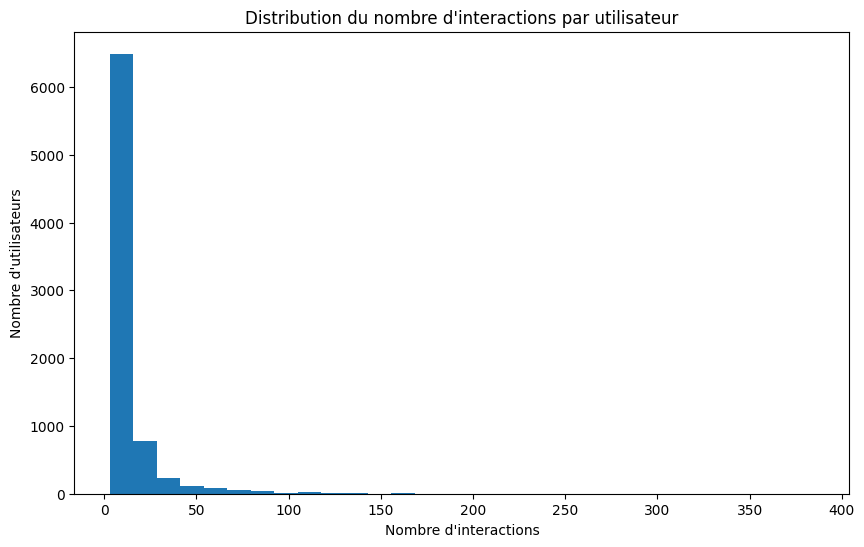

In [6]:
#Distribution des interactions par utilisateurs
import matplotlib.pyplot as plt

# Compter le nombre d'interactions par utilisateur
user_interactions_count = df_interactions_train['u'].value_counts()

# Visualiser la distribution des interactions par utilisateur
plt.figure(figsize=(10, 6))
user_interactions_count.plot(kind='hist', bins=30)
plt.title("Distribution du nombre d'interactions par utilisateur")
plt.xlabel("Nombre d'interactions")
plt.ylabel("Nombre d'utilisateurs")
plt.show()

In [ ]:
# Interprétation :
# Ce graphique montre que la majorité des utilisateurs ont un nombre limité d'interactions, avec une forte concentration en dessous de 50 interactions.
# Quelques utilisateurs sont nettement plus actifs, avec des interactions dépassant les 300.
# Cette distribution de longue traîne suggère que la plupart des utilisateurs sont peu actifs, ce qui pourrait influencer le choix d'algorithmes de recommandation en tenant compte des besoins des utilisateurs moins fréquents.

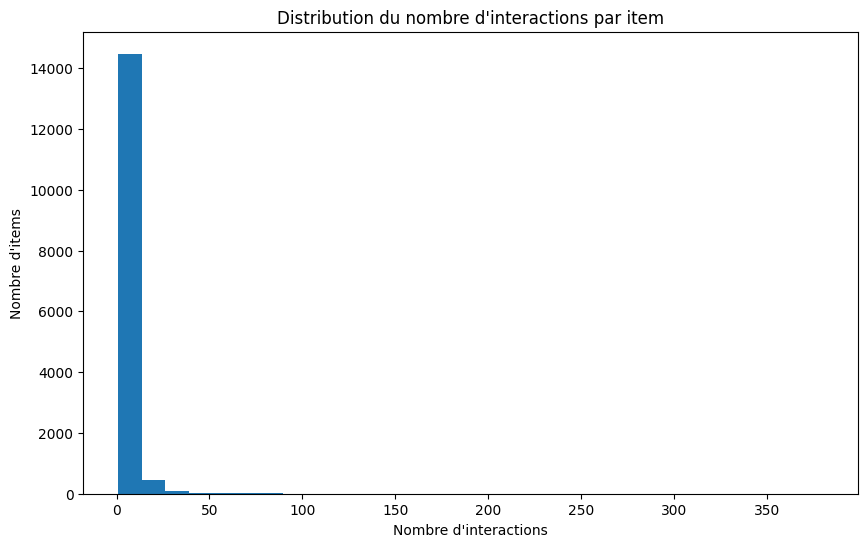

In [7]:
#Distribution des interactions par item
# Compter le nombre d'interactions par item
item_interactions_count = df_interactions_train['i'].value_counts()

# Visualiser la distribution des interactions par item
plt.figure(figsize=(10, 6))
item_interactions_count.plot(kind='hist', bins=30)
plt.title("Distribution du nombre d'interactions par item")
plt.xlabel("Nombre d'interactions")
plt.ylabel("Nombre d'items")
plt.show()

In [ ]:
# Interprétation :
# Ce graphique montre que la plupart des items (livres) ont très peu d'interactions, tandis que quelques-uns sont beaucoup plus populaires, avec des pics allant jusqu'à plus de 300 interactions.
# Cela indique une distribution typique de longue traîne, où une minorité d'items attire la majorité des interactions.
# Ce phénomène est important pour le modèle de recommandation, car il faudra adapter les algorithmes pour bien gérer la rareté des interactions.

Analyse des sujets et auteurs dans le dataset des items





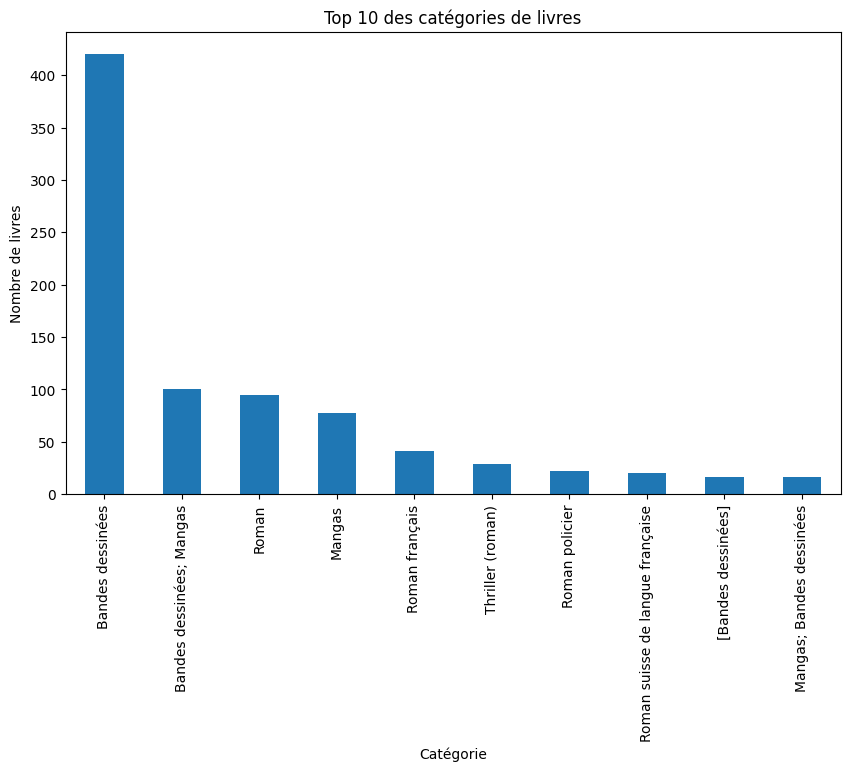

In [8]:
#Analyse des catégories de livres

# Vérifier la présence de la colonne 'Subjects' et analyser les catégories
if 'Subjects' in df_items.columns:
    # Compter les catégories les plus fréquentes
    subjects_counts = df_items['Subjects'].value_counts().head(10)

    # Visualiser les catégories les plus fréquentes
    plt.figure(figsize=(10, 6))
    subjects_counts.plot(kind='bar')
    plt.title("Top 10 des catégories de livres")
    plt.xlabel("Catégorie")
    plt.ylabel("Nombre de livres")
    plt.show()

    # Interprétation :
    # Ce graphique montre les 10 catégories de livres les plus populaires. Ces informations peuvent aider
    # à identifier les sujets d'intérêt pour les utilisateurs et à ajuster le modèle en conséquence.
else:
    print("La colonne 'Subjects' n'est pas présente dans le dataset des items.")

In [ ]:
# Interprétation :
# Les bandes dessinées dominent avec environ 400 livres, suivies des mangas à environ 100 livres.
# Cette popularité des catégories pourrait influencer les recommandations, car il serait pertinent de prioriser ces genres pour les utilisateurs intéressés.
# La distribution montre une préférence pour des genres spécifiques, ce qui est utile pour construire des filtres basés sur les préférences des utilisateurs.

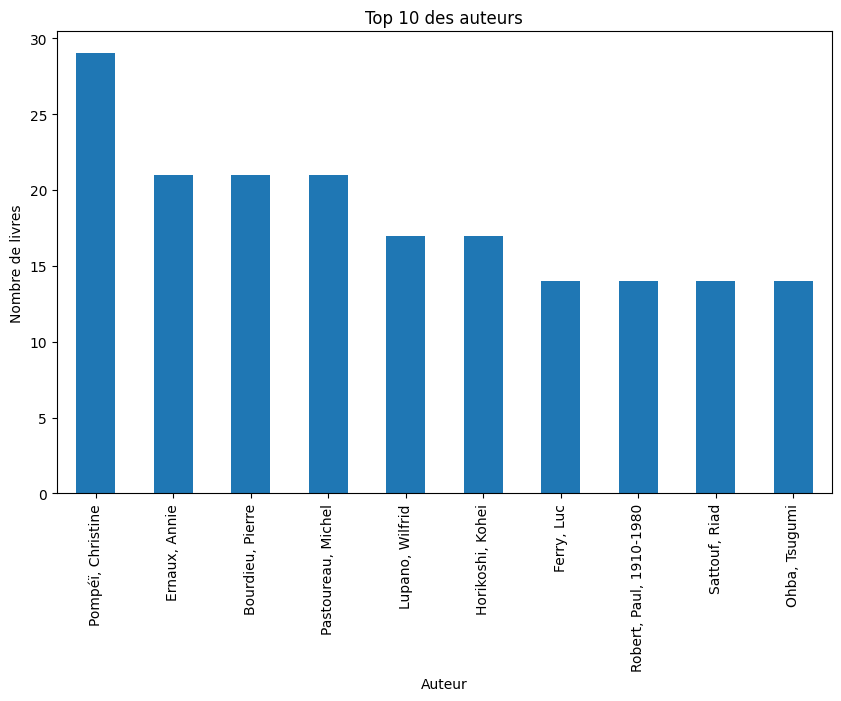

In [9]:
#Analyse des auteurs

# Vérifier la présence de la colonne 'Author' et analyser les auteurs
if 'Author' in df_items.columns:
    # Compter les auteurs les plus fréquents
    author_counts = df_items['Author'].value_counts().head(10)

    # Visualiser les auteurs les plus fréquents
    plt.figure(figsize=(10, 6))
    author_counts.plot(kind='bar')
    plt.title("Top 10 des auteurs")
    plt.xlabel("Auteur")
    plt.ylabel("Nombre de livres")
    plt.show()

    # Interprétation :
    # Ce graphique montre les 10 auteurs les plus représentés dans le dataset.
    # Cela peut indiquer une préférence pour certains auteurs et pourrait influencer les recommandations
    # pour les utilisateurs qui suivent des auteurs spécifiques.
else:
    print("La colonne 'Author' n'est pas présente dans le dataset des items.")

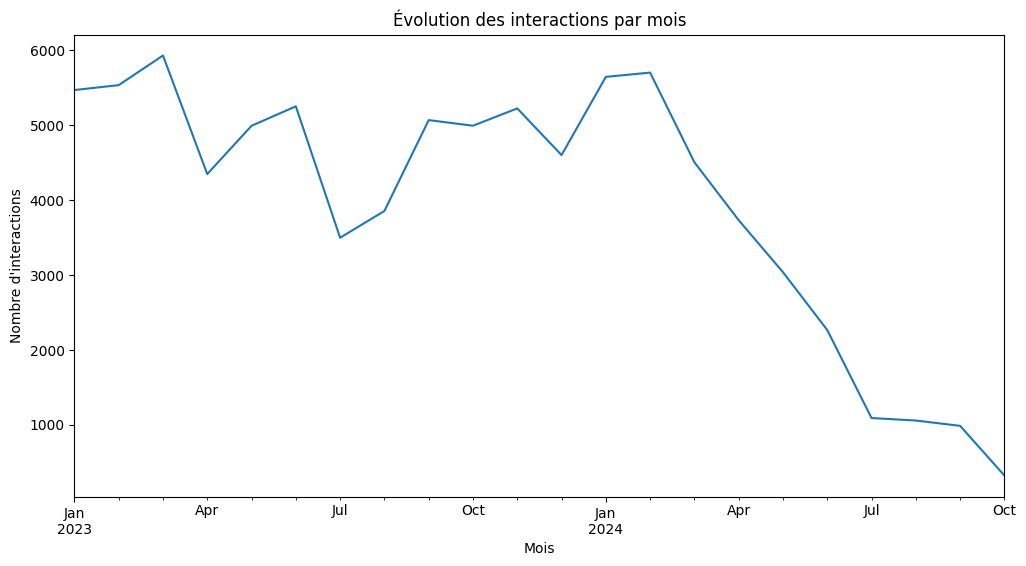

In [10]:
# Analyse temporelle des interactions (est ce qu'il y a des tendances saisonnières ou des pics d'activités?)

# Convertir le timestamp en format datetime pour une analyse temporelle
df_interactions_train['datetime'] = pd.to_datetime(df_interactions_train['t'], unit='s')

# Visualiser la distribution des interactions au fil du temps
df_interactions_train['datetime'].groupby(df_interactions_train['datetime'].dt.to_period("M")).count().plot(kind='line', figsize=(12, 6))
plt.title("Évolution des interactions par mois")
plt.xlabel("Mois")
plt.ylabel("Nombre d'interactions")
plt.show()

# Interprétation :
# Ce graphique montre l'évolution des interactions par mois. Les pics ou tendances spécifiques au fil du temps
# pourraient révéler des périodes de haute activité, utiles pour comprendre le comportement des utilisateurs
# et ajuster les recommandations en fonction de la saisonnalité.

In [ ]:
# Interprétation :
# Ce graphique montre une baisse progressive des interactions sur la période affichée, avec des pics d'activité autour de janvier et octobre 2023 et une forte diminution ensuite.
# Cette tendance pourrait refléter des changements saisonniers ou des événements spécifiques qui influencent l’utilisation de la bibliothèque.
# Cela pourrait également signifier une diminution de l'engagement des utilisateurs avec le temps, un facteur à prendre en compte dans les recommandations.

2. Data cleaning : Address any missing or inconsistent data. Consider handling outliers, duplicates, or irrelevant records (e.g., users with too few rentals).

3. Additional features: genre frequency, author popularity and book ratings. Perform exploratory data analysis (EDA) to understand patterns, such as book popularity trends.

4. Modeling and recommendations techniques :
  4.1 Collaborative filtering
User-User CF: Recommend books based on similarity between users with similar rental histories.

Item-Item CF: Recommend books similar to items a user has previously rented.

Implement both techniques and evaluate them using the Precision@10 and Recall@10 metrics.

4.2 Content based filtering: Use metadata, such as book title, author, and genre, to create text embeddings (e.g., using BERT or OpenAI models). This approach can recommend items similar to the ones a user has rented.

4.3 Hyybrid approach: Combine collaborative and content-based methods to improve recommendations by balancing personalization with general popularity.

5. Data Augmentation

  5.1 integrate external Data: Use APIs like Google Books to enrich metadata (e.g., book synopsis, reviews, and author background). This can improve the model’s understanding of items.

  5.2 Embeddings Initialization: Use augmented metadata to create embeddings for each book, enhancing item representations in your model.